<a href="https://colab.research.google.com/github/CharisMichailidis/Basic_2Char_Model/blob/main/Basic_2char_Model_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset Information

#### The objective of this task is to sample names from a 2-characters language model(neural-network).The dataset containes 32033 names in a txt file.First,we introduce a basic probabilistic model and finally,we introduce a basic neural network and we sample from both of them.

In [ ]:
words = open('names.txt','r').read().splitlines()

In [ ]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [ ]:
len(words)

32033

In [ ]:
min(len(w) for w in words)

2

In [ ]:
max(len(w) for w in words)

15

## We are going to work with "words" and "words[:1]" 

In [ ]:
#print(words)
#print(words[1:])

In [ ]:
k1=('emma','olivia','ava','sophia')
k2=('olivia','ava','sophia')
list(zip(k1,k2))

[('emma', 'olivia'), ('olivia', 'ava'), ('ava', 'sophia')]

In [ ]:
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1

In [ ]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

## Tensors

## Train the Model

In [ ]:
import torch

In [ ]:
N = torch.zeros((28,28), dtype=torch.int32 )

In [ ]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [ ]:
for i,s in enumerate(chars):
  print(i,s)

0 a
1 b
2 c
3 d
4 e
5 f
6 g
7 h
8 i
9 j
10 k
11 l
12 m
13 n
14 o
15 p
16 q
17 r
18 s
19 t
20 u
21 v
22 w
23 x
24 y
25 z


In [ ]:
print(f"words:{words}")
print(f"chars:{chars}")
print(f"stoi:{stoi}")
print(f"itos:{itos}")

words:['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn', 'abigail', 'emily', 'elizabeth', 'mila', 'ella', 'avery', 'sofia', 'camila', 'aria', 'scarlett', 'victoria', 'madison', 'luna', 'grace', 'chloe', 'penelope', 'layla', 'riley', 'zoey', 'nora', 'lily', 'eleanor', 'hannah', 'lillian', 'addison', 'aubrey', 'ellie', 'stella', 'natalie', 'zoe', 'leah', 'hazel', 'violet', 'aurora', 'savannah', 'audrey', 'brooklyn', 'bella', 'claire', 'skylar', 'lucy', 'paisley', 'everly', 'anna', 'caroline', 'nova', 'genesis', 'emilia', 'kennedy', 'samantha', 'maya', 'willow', 'kinsley', 'naomi', 'aaliyah', 'elena', 'sarah', 'ariana', 'allison', 'gabriella', 'alice', 'madelyn', 'cora', 'ruby', 'eva', 'serenity', 'autumn', 'adeline', 'hailey', 'gianna', 'valentina', 'isla', 'eliana', 'quinn', 'nevaeh', 'ivy', 'sadie', 'piper', 'lydia', 'alexa', 'josephine', 'emery', 'julia', 'delilah', 'arianna', 'vivian', 'kaylee', 'sophie', 'brielle', 'madeline', 'peyton',

In [ ]:
stoi['s']

19

In [ ]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  #print(f"chs: {chs}")
  for ch1, ch2 in zip(chs, chs[1:]):
    #print(f"ch1,ch2:{ch1},{ch2}")   
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    #print(f"stoi[ch1],stoi[ch2]:{ix1},{ix2}")
    N[ix1, ix2] += 1


In [ ]:
print(f"chs,chs[1:]:{chs},{chs[1:]}")
for ch1, ch2 in zip(chs, chs[1:]):
    print(f"ch1,ch2:{ch1},{ch2}")

chs,chs[1:]:['.', 'z', 'z', 'y', 'z', 'x', '.'],['z', 'z', 'y', 'z', 'x', '.']
ch1,ch2:.,z
ch1,ch2:z,z
ch1,ch2:z,y
ch1,ch2:y,z
ch1,ch2:z,x
ch1,ch2:x,.


In [ ]:
N

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929,    0],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435,    0],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4,    0],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1,    0],
        [3983,  679,

(-0.5, 27.5, 27.5, -0.5)

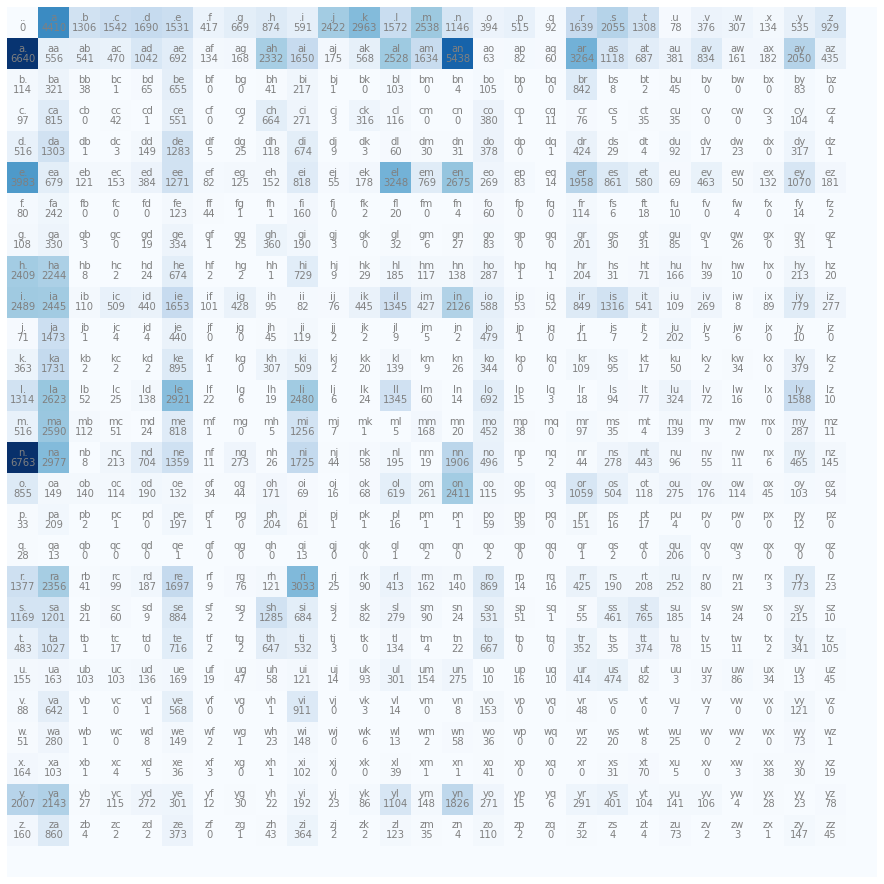

In [ ]:

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N , cmap='Blues')
for i in range(27):
    for j in range(27):
       chstr = itos[i] + itos[j]
       plt.text(j, i ,chstr ,ha = "center" ,va ="bottom" , color = "gray")
       plt.text(j , i , N[i,j].item() , ha ="center" , va="top" , color = "gray")
plt.axis('off')




In [ ]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929,    0], dtype=torch.int32)

In [ ]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290,
        0.0000])

In [ ]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples= 1, replacement = True, generator = g ).item()
itos[ix]

'm'

In [ ]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290,
        0.0000])

In [ ]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290,
        0.0000])

In [ ]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [ ]:
torch.multinomial(p, num_samples= 100, replacement = True, generator = g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [ ]:
p.shape

torch.Size([3])

### Train the Model on this place

In [ ]:
print(N+1)
P = (N+1).float()
print(P)
P /= P.sum(1, keepdims=True)

tensor([[   1, 4411, 1307, 1543, 1691, 1532,  418,  670,  875,  592, 2423, 2964,
         1573, 2539, 1147,  395,  516,   93, 1640, 2056, 1309,   79,  377,  308,
          135,  536,  930,    1],
        [6641,  557,  542,  471, 1043,  693,  135,  169, 2333, 1651,  176,  569,
         2529, 1635, 5439,   64,   83,   61, 3265, 1119,  688,  382,  835,  162,
          183, 2051,  436,    1],
        [ 115,  322,   39,    2,   66,  656,    1,    1,   42,  218,    2,    1,
          104,    1,    5,  106,    1,    1,  843,    9,    3,   46,    1,    1,
            1,   84,    1,    1],
        [  98,  816,    1,   43,    2,  552,    1,    3,  665,  272,    4,  317,
          117,    1,    1,  381,    2,   12,   77,    6,   36,   36,    1,    1,
            4,  105,    5,    1],
        [ 517, 1304,    2,    4,  150, 1284,    6,   26,  119,  675,   10,    4,
           61,   31,   32,  379,    1,    2,  425,   30,    5,   93,   18,   24,
            1,  318,    2,    1],
        [3984,  680,

## Sample from the Model

In [ ]:
g = torch.Generator().manual_seed(2147483647)

for i in range(15):
  
  out = []
  ix = 0
  #(we feed in out the next letter of the letter we had)
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples = 1,replacement = True, generator=g).item()
    out.append(itos[ix])
    if ix  == 0:
      break
  print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchthizarie.
odaren.
iaddash.
h.
jhinatien.
egushl.
h.
br.
a.
jayn.
ilemannariaenien.


# Summarizing the quality of the model

# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

In [ ]:
log_likelihood = 0.0
n = 0

for w in words:
#for w in ["andrejq"]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-559978.7500)
nll=tensor(559978.7500)
2.4544754028320312


In [ ]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
  chs = ['.' ] + list(w) + ['.']
  for ch1,ch2 in zip(chs,chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)    

. e
e m
m m
m a
a .


In [ ]:
xs

tensor([ 0,  5, 13, 13,  1])

In [ ]:
ys

tensor([ 5, 13, 13,  1,  0])

In [ ]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes = 27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
xenc.shape

torch.Size([5, 27])

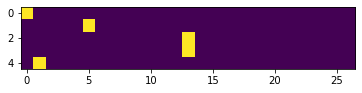

In [ ]:
plt.imshow(xenc)

In [ ]:
xenc.dtype

torch.float32

In [ ]:
W = torch.randn((27, 27)) #27X27
xenc @ W #(5X27)X(27X27) --> 5X27

tensor([[ 1.1936e-04, -2.1707e+00,  9.1469e-01, -1.5795e+00, -7.4897e-01,
          3.6966e-01, -1.1536e+00, -4.6355e-01,  6.6413e-01, -3.8362e-01,
          7.5848e-01, -2.3028e+00, -1.8663e-01,  6.6957e-01,  9.6516e-01,
          1.3460e+00, -5.1210e-02,  4.6667e-01,  7.0820e-01,  8.6270e-01,
         -6.1085e-01, -8.2997e-01, -6.7059e-02,  1.0076e+00,  1.2854e+00,
         -7.8874e-01, -2.2869e+00],
        [ 5.5695e-01, -1.0470e+00, -1.5492e-01,  2.1920e+00,  2.7123e-01,
          7.9676e-01, -1.0115e+00,  7.2508e-01, -2.0757e+00,  2.3791e+00,
         -2.6468e-01,  3.1499e-01, -4.7900e-01,  1.2586e+00, -1.5486e-01,
          1.0156e+00, -3.0179e-01,  2.7832e-01,  1.1590e+00, -5.6138e-02,
         -5.5972e-01,  2.1790e+00,  7.5365e-01,  1.8220e-01, -2.9824e-01,
         -5.3793e-01,  2.1588e-01],
        [ 4.5394e-01, -1.6572e-02, -1.7201e+00,  6.5404e-02, -1.0665e+00,
          1.4622e+00,  4.5524e-01, -5.0955e-01, -1.5197e+00,  1.3957e+00,
         -4.0833e-01, -1.1238e-01, -1.21

##  Calculating Probabilities

In [ ]:
logits = xenc @ W #log-counts
counts = logits.exp() #equivalent of N
print(counts)
probs = counts / counts.sum(1, keepdims=True)
probs.type()
print(probs)

tensor([[ 1.0001,  0.1141,  2.4960,  0.2061,  0.4729,  1.4472,  0.3155,  0.6290,
          1.9428,  0.6814,  2.1350,  0.1000,  0.8298,  1.9534,  2.6252,  3.8422,
          0.9501,  1.5947,  2.0303,  2.3696,  0.5429,  0.4361,  0.9351,  2.7391,
          3.6161,  0.4544,  0.1016],
        [ 1.7453,  0.3510,  0.8565,  8.9531,  1.3116,  2.2183,  0.3637,  2.0649,
          0.1255, 10.7949,  0.7674,  1.3702,  0.6194,  3.5203,  0.8565,  2.7612,
          0.7395,  1.3209,  3.1868,  0.9454,  0.5714,  8.8377,  2.1248,  1.1999,
          0.7421,  0.5840,  1.2409],
        [ 1.5745,  0.9836,  0.1790,  1.0676,  0.3442,  4.3154,  1.5766,  0.6008,
          0.2188,  4.0378,  0.6648,  0.8937,  0.2957,  0.8326,  0.3011,  0.5436,
          1.6691,  0.7216,  1.3751,  2.7322,  1.5524,  2.9791,  1.0730,  0.6297,
          2.8714,  1.8334,  1.8323],
        [ 1.5745,  0.9836,  0.1790,  1.0676,  0.3442,  4.3154,  1.5766,  0.6008,
          0.2188,  4.0378,  0.6648,  0.8937,  0.2957,  0.8326,  0.3011,  0.5436

In [ ]:
probs.shape

torch.Size([5, 27])

### For each one of the 5 inputs(examples) Now we have a row(of probabilities) that came out from the neural net

In [ ]:
probs[0]

tensor([0.0274, 0.0031, 0.0683, 0.0056, 0.0129, 0.0396, 0.0086, 0.0172, 0.0531,
        0.0186, 0.0584, 0.0027, 0.0227, 0.0534, 0.0718, 0.1051, 0.0260, 0.0436,
        0.0555, 0.0648, 0.0148, 0.0119, 0.0256, 0.0749, 0.0989, 0.0124, 0.0028])

In [ ]:
probs.shape

torch.Size([5, 27])

In [ ]:
probs[0].sum() 

tensor(1.)

## (5, 27) @ (27, 27) -> (5, 27)


# SUMMARY ------------------------------>>>>

In [ ]:
xs

tensor([ 0,  5, 13, 13,  1])

In [ ]:
ys

tensor([ 5, 13, 13,  1,  0])

In [ ]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27),generator = g)

In [ ]:
#forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W #predict log-counts
counts =logits.exp() #counts equivalent to N
probs = counts /counts.sum(1, keepdims=True) #probalities for the next character
#btw : the last two columns here are together called a 'softmax'

In [ ]:
probs.shape

torch.Size([5, 27])

In [ ]:
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() #input character index
  y = ys[i].item() #label character index
  print('------------------------------------')
  print(f"bigram example:{i+1}:{itos[x]},{itos[y]} (indexes {x},{y})")
  print("input to the neural net:", x)
  print("output probabilities from the neural net:", probs[i])
  print("label(actual next character):", y)
  p = probs[i, y]
  print("probability assigned by the net to the correct character:", p.item())
  logp = torch.log(p)
  print("log_likelihood:", logp.item())
  nll = -logp
  print("negative log likelihood:", nll.item())
  nlls[i] = nll

print("=======================================")
print("average negative log_likelihood, i.e. loss=", nlls.mean().item())

------------------------------------
bigram example:1:.,e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label(actual next character): 5
probability assigned by the net to the correct character: 0.01228625513613224
log_likelihood: -4.399273872375488
negative log likelihood: 4.399273872375488
------------------------------------
bigram example:2:e,m (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label(actual next character): 13
probability as

## --------- !!! OPTIMIZATION !!!  --------------


---



In [ ]:
xs

tensor([ 0,  5, 13, 13,  1])

In [ ]:
ys

tensor([ 5, 13, 13,  1,  0])

In [ ]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27),generator = g, requires_grad = True) #requires_grad = True for calculating the gradients

In [ ]:
#forward pass
xenc = F.one_hot(xs, num_classes= 27).float() # input to the network: one hot encoding
logits = xenc @ W #predict log-counts
counts = logits.exp() #counts, equivalent to N 
probs = counts / counts.sum(1, keepdims=True) #probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean()

In [ ]:
print(loss.item())

3.7693049907684326


In [ ]:
#backward pass
W.grad = None # set to zero the gradient
loss.backward()

In [ ]:
W.shape

torch.Size([27, 27])

In [ ]:
W.grad.shape

torch.Size([27, 27])

In [ ]:
W[0,0].item()

1.5673619508743286

In [ ]:
W.grad [0,0]

tensor(0.0121)

## If we take a small h and we change(sum) it to the W[0,0] the loss function is going to change(be increased) by W.grad[0,0] as W.grad[0,0]>0


# W[0,0] + h --------------------> ΔLoss_Function = W.grad[0,0]

In [ ]:
W.grad    #the influence of each weight on the loss function e.g. 0.0121 shows us that this weight has a positive influence in the loss

tensor([[ 0.0121,  0.0020,  0.0025,  0.0008,  0.0034, -0.1975,  0.0005,  0.0046,
          0.0027,  0.0063,  0.0016,  0.0056,  0.0018,  0.0016,  0.0100,  0.0476,
          0.0121,  0.0005,  0.0050,  0.0011,  0.0068,  0.0022,  0.0006,  0.0040,
          0.0024,  0.0307,  0.0292],
        [-0.1970,  0.0017,  0.0079,  0.0020,  0.0121,  0.0062,  0.0217,  0.0026,
          0.0025,  0.0010,  0.0205,  0.0017,  0.0198,  0.0022,  0.0046,  0.0041,
          0.0082,  0.0016,  0.0180,  0.0106,  0.0093,  0.0062,  0.0010,  0.0066,
          0.0131,  0.0101,  0.0018],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [ ]:
W.data += -0.1 * W.grad

##  --------- !!! OPTIMIZATION made clear !!!  --------------

# Create the dataset

In [ ]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
     ix1 = stoi[ch1]
     ix2 = stoi[ch2]
     xs.append(ix1)
     ys.append(ix2)
xs = torch.tensor(xs) 
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ',num)

#initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)


number of examples:  228146


# Gradient Descent

In [ ]:
for k in range(1):

  #forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() #counts equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for the next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  #backward pass
  W.grad = None # set to zero the gradient
  loss.backward()

  # update
  W.data += -50 * W.grad

3.7686190605163574


##  finally, sample from the 'neural net' model

In [ ]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):

  out = []
  ix = 0
  while True:

    #---------------
    #BEFORE
    #p = P[ix]
    #---------------
    #NOW:
    xenc = F.one_hot(torch.tensor([ix]),num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() #counts, equivalent to N 
    p = counts / counts.sum(1, keepdims=True) #proobabilities for the next character
    #---------------

    ix =torch.multinomial(p, num_samples= 1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

rtpa.
zxckqrixttszslw.
ouinpcet.
jc.
rlpxqvyduslbt.
